### 7. Use Linear Regression to analyze the correlation among wine quality and several key factors of wines, such as pH and density. 

In [86]:
# imports:

import pandas as pd
import numpy as np
import sklearn 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [87]:
# 1. Read the data:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
val = pd.read_csv('val.csv')

target_column = 'quality'

x_train = train.drop(columns=[target_column])
print(x_train)
y_train = train[target_column]
print(y_train)

     Unnamed: 0  fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
0           233       2.626785          0.721110     0.500000        1.612452   
1           241       3.464102          0.616441     0.748331        1.449138   
2           268       2.626785          0.734847     0.200000        1.732051   
3           299       2.626785          0.818535     0.244949        1.449138   
4          1104       2.828427          0.692820     0.583095        1.483240   
..          ...            ...               ...          ...             ...   
954         699       3.435113          0.616441     0.741620        1.449138   
955        1434       3.193744          0.734847     0.608276        3.924283   
956         601       3.633180          0.678233     0.721110        1.483240   
957         693       3.000000          0.692820     0.565685        1.673320   
958         582       3.420526          0.700000     0.700000        1.483240   

     chlorides  free_sulfur

In [88]:
# 2. Write a function to train linear regressor using training data.
# First, compute quadratic features from input features (encouraged to try linear/cubic features). 
# Scipy:
degree = 2 # set to 2 to use quadratic features
poly = PolynomialFeatures(degree=degree, include_bias=False)
x_train_poly = poly.fit_transform(x_train)
x_val_poly = poly.transform(val.drop(columns=[target_column]))
model = LinearRegression()
model.fit(x_train_poly, y_train)

LinearRegression()

In [89]:
# 3. To evaluate your model, compute Mean Squared Error (MSE) on training data and validation data
from sklearn.metrics import mean_squared_error
y_train_pred = model.predict(x_train_poly)
y_val_pred = model.predict(x_val_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
val_mse = mean_squared_error(val[target_column], y_val_pred)
print(f"Train MSE: {train_mse}")
print(f"Validation MSE: {val_mse}")

Train MSE: 0.33069268586180933
Validation MSE: 0.4146219002573809


In [90]:
# 4. Notice the low errors on train data and high errors on validation. 
# This issue is called overfitting.
    # Models learn certain feature-target correlations that only exist in training data that does not generalize to test data. 
# To mitigate this, use L2 regularization (Ridge regression) to penalize large weights.

from sklearn.linear_model import Ridge
alpha = 0.9 # controls intensity of L2 regularization
model = Ridge(alpha=alpha)
model.fit(x_train_poly, y_train)

y_val_pred = model.predict(x_val_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
val_mse = mean_squared_error(val[target_column], y_val_pred)
print(f"Train MSE: {train_mse}")
print(f"Validation MSE: {val_mse}")

Train MSE: 0.33069268586180933
Validation MSE: 0.40057093325783094


C:\Users\koola\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=9.64845e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\koola\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.15752e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\koola\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.60646e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\koola\AppD

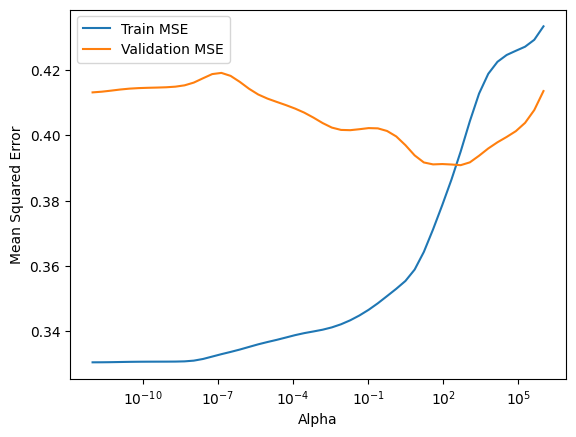

In [91]:
# try different alphas, observe changes in validation error. 
# plot validation error as a function of alpha
import matplotlib.pyplot as plt
alphas = np.logspace(-12, 6)
train_errors = []
val_errors = []
for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(x_train_poly, y_train)
    y_train_pred = model.predict(x_train_poly)
    y_val_pred = model.predict(x_val_poly)
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    val_errors.append(mean_squared_error(val[target_column], y_val_pred))
plt.plot(alphas, train_errors, label='Train MSE')
plt.plot(alphas, val_errors, label='Validation MSE')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()


In [ ]:
# 5. Based on your observations of validation errors, choose the optimal L2 regularization intensity. Report the performance of your best model on test data in test.csv. 

# Lowest validation MSE
# 10^0 < alpha < 10^2
alpha = 10**2
model = Ridge(alpha=alpha)
model.fit(x_train_poly, y_train)
y_test_pred = model.predict(poly.transform(test.drop(columns=[target_column])))
test_mse = mean_squared_error(test[target_column], y_test_pred)
print(f"Test MSE: {test_mse}")




Test MSE: 0.4893060317901191


In [109]:
alpha = 7.5
model = Ridge(alpha=alpha)
model.fit(x_train_poly, y_train)
y_test_pred = model.predict(poly.transform(test.drop(columns=[target_column])))
test_mse = mean_squared_error(test[target_column], y_test_pred)
print(f"Test MSE: {test_mse}")

Test MSE: 0.4726757971303415


Test MSE: 0.4726827929475917